In [1]:
import os
import pandas as pd
from bertopic import BERTopic
from pathlib import Path

import os
from bertopic import BERTopic
from utils.filemanagement import load_from_file
from utils.filemanagement import get_project_root


/home/imattehjelp/anaconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/imattehjelp/anaconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/imattehjelp/anaconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaD

In [2]:
model_type="bertopic"
model_name="BERTopic"
experiment="npl"
embedding_model = "all-roberta-large-v1"
data_type="np_large_stopwords"
file_name_data = f"{data_type}.csv"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_topics = f"preprocessed_data/results/npl/{model_type}"
folder_path_data =f"preprocessed_data"

df = pd.read_csv("preprocessed_data/data/np_large_stopwords.csv",index_col=0)
TOPN = 20
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
folder_name = f"Norwegian-Parliament-Large-Experiment/models"

ROOT_PATH = get_project_root()
print(ROOT_PATH)

file_path = os.path.join("NPL_model")


/home/imattehjelp


In [4]:
import math

In [5]:
data = df.text.values.tolist()
timestamps = df.date.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item)[0:255])

In [6]:
from sentence_transformers import SentenceTransformer
emb_model = SentenceTransformer("all-roberta-large-v1")

In [7]:
topic_model = BERTopic(verbose=True, embedding_model = emb_model)
try:
    topic_model = topic_model.load(file_path)
except:
    print("correctly")
    topics,probs = topic_model.fit_transform(documents=new_data)

In [8]:
topic_model.get_topic_info()

Topic   Count                                               Name
0        -1  148805                           -1_statsråden_kr_pst_000
1         0    8531  0_replikkordskifte_replikkordsskifte_replikksk...
2         1    5150       1_transportplan_nasjonal_transport_trafikken
3         2    4973  2_omme_replikkordskiftet_replikordskiftet_repl...
4         3    3957          3_partier_partiene_partiet_senterpartiets
...     ...     ...                                                ...
3075   3074      10                        3074_11_12_sakene_behandlet
3076   3075      10    3075_voteringsforklaring_voteringen_xxvi_xxviii
3077   3076      10  3076_maritime_næringsklynger_næringene_kontrah...
3078   3077      10      3077_travel_jordmødre_reiseutgifter_utviklede
3079   3078      10  3078_inspirerte_treminutters_innlegg_represent...

[3080 rows x 3 columns]

In [9]:
topics = topic_model.get_topics()

In [10]:
#doc_info = topic_model.get_document_info(new_data)

In [11]:
#topics = doc_info['Topic']

In [12]:
#new_topics = topic_model.reduce_outliers(documents=new_data,topics=topics)

In [13]:
#topic_model.update_topics(docs=new_data,topics=new_topics)

In [14]:
#topic_model.get_topic_info()

In [15]:
#topic_model.visualize_topics()

In [16]:
topic_model.save(os.path.join("NPL_model"))

In [17]:
topics

{-1: [('statsråden', 0.0003672714030515057),
  ('kr', 0.00036236426111513397),
  ('pst', 0.00035689548110383253),
  ('000', 0.0003496217383226905),
  ('skole', 0.00034848369411146537),
  ('saken', 0.00034355354193808547),
  ('kommunene', 0.0003383772434197872),
  ('statsråd', 0.00033569802933041944),
  ('komiteen', 0.00033219656982552145),
  ('svaret', 0.00033168812778996623)],
 0: [('replikkordskifte', 0.190106993330349),
  ('replikkordsskifte', 0.0016897797322925924),
  ('replikkskifte', 0.0009260873597975405),
  ('replikkordksifte', 0.0009260873597975405),
  ('replikkkordskifte', 0.0008448898661462962),
  ('replikkordskifter', 0.0004608328214632356),
  ('vente', 0.0001252270962899551),
  ('replikk', 6.213200310977349e-05),
  ('', 1e-05),
  ('', 1e-05)],
 1: [('transportplan', 0.009054545807269344),
  ('nasjonal', 0.005033717511710891),
  ('transport', 0.00429412941371309),
  ('trafikken', 0.004094375712207918),
  ('kollektivtransport', 0.003518417586938959),
  ('trafikksikkerhet', 0

In [18]:
NUM_TOPICS = len(topic_model.topic_sizes_.keys())-1

In [19]:
formatted_topics = [dict(topics[i]) for i in range(NUM_TOPICS)]

In [20]:
print(formatted_topics)

[{'replikkordskifte': 0.190106993330349, 'replikkordsskifte': 0.0016897797322925924, 'replikkskifte': 0.0009260873597975405, 'replikkordksifte': 0.0009260873597975405, 'replikkkordskifte': 0.0008448898661462962, 'replikkordskifter': 0.0004608328214632356, 'vente': 0.0001252270962899551, 'replikk': 6.213200310977349e-05, '': 1e-05}, {'transportplan': 0.009054545807269344, 'nasjonal': 0.005033717511710891, 'transport': 0.00429412941371309, 'trafikken': 0.004094375712207918, 'kollektivtransport': 0.003518417586938959, 'trafikksikkerhet': 0.0034519297951279147, 'transportplanen': 0.0030950626059220517, 'kollektivtrafikken': 0.0030110180181716034, 'trafikk': 0.002808615350060049, 'kollektivtransporten': 0.0023367924833372967}, {'omme': 0.14264317468306714, 'replikkordskiftet': 0.12190935346820088, 'replikordskiftet': 0.0014485281498965536, 'replikkordsdkiftet': 0.0007938689192999715, 'ferdig': 0.0007197626570774076, 'replikkskiftet': 0.0006546963805930839, 'boblene': 0.0006323138027576089, 

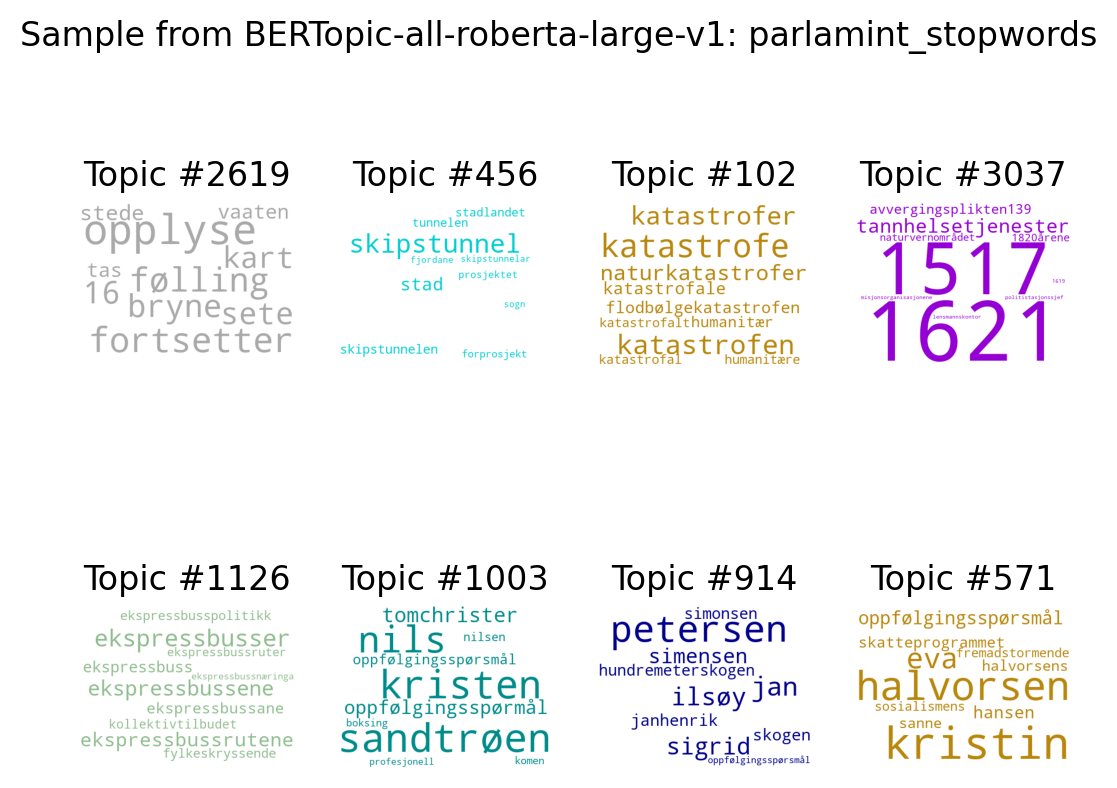

In [21]:
from utils.filemanagement import make_excerpt_wordcloud

random_sample = True

excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics, NUM_TOPICS, f"Sample from {model_name}-{embedding_model}: {data_type}",
                                          random_sample=random_sample,seed=42)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"))


In [22]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(topics[i]))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [23]:
from utils.filemanagement import write_topics_file
topic_words_numbered = []
for i, key in enumerate(topics.keys()):
    if key == -1:
        continue
    r = topics[key]
    rr = []
    for item in r:
        rr.append(item[0])
    topic_words_numbered.append((i,rr))



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [24]:
from utils.filemanagement import load_model_topics
loaded_topics = load_model_topics(folder_path_topics, file_name)

In [25]:
topics_over_time = topic_model.topics_over_time(docs=new_data,
                                                timestamps=timestamps,
                                                global_tuning=True,
                                                evolution_tuning=True,
                                                nr_bins=24) 

18it [06:42, 22.38s/it]


In [26]:
topic_model.visualize_topics_over_time(topics_over_time,topics=[5,15,17,7],width=1000)

In [27]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [28]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [29]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

/home/imattehjelp/preprocessed_data/stats/parlamint_stopwords_co_freq.pkl


In [30]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
-17.476307159208773 -2.584962500721156 6.760758484633031 ('replikkordskifte', 'replikkordskifter') 6 13507 81
-23.02383010747093 -3.3219280948873626 6.930863477420212 ('replikkordskifte', 'vente') 10 13507 6314
-19.67178580135712 -6.189824558880018 3.1780845505767483 ('replikk', 'replikkordskifte') 73 13507 4514
-15.1581126111891 -3.3219280948873626 4.563046573620393 ('replikk', 'replikkordskifter') 10 81 4514
-18.833791910941937 -5.930737337562887 3.1756240141771803 ('replikk', 'vente') 61 6314 4514
-30.783245799144865 2v
90 x2
10
-0.34203606443494294 n printed
10
-12.737116195731373 -13.886553957682734 0.9172265656797138 ('nasjonal', 'transportplan') 15145 6380 16207
-14.299753532921748 -10.65105169117893 1.3425672832631756 ('transport', 'transportplan') 1608 6380 5083
-13.501728707512806 -10.377210530388552 1.3010942264276546 ('trafikken', 'transportplan') 1330 6380 2418
-13.52114032329792 -9.857980995127573 1.3715932633650754 ('kollektivtransport', 'transportplan') 928 6380 1710

-13.205086846110216 -5.584962500721157 2.364400270262354 ('forsvarets', 'musikken') 48 4874 93
-13.063959108975338 -7.169925001442313 1.822049617861745 ('forsvarets', 'korps') 144 4874 253
-16.092192789704285 -1.5849625007211563 10.153043231232507 ('forsvarets', 'umusikalsk') 3 4874 43
-9.939089417996668 -3.1699250014423126 3.1354336186106586 ('musikere', 'musikken') 9 95 93
-9.377210530388552 -4.584962500721157 2.045209863529666 ('musikere', 'rock') 24 95 168
-10.852409464884166 -3.700439718141092 2.9327351048798738 ('korps', 'musikere') 13 95 253
-8.005954723137622 -4.08746284125034 1.9586611631895912 ('musikere', 'rytmiske') 17 95 46
-8.802193216941825 -5.129283016944966 1.7160669800950987 ('musikken', 'rock') 35 93 168
-11.937189885081185 -2.584962500721156 4.617935417535431 ('korps', 'musikken') 6 93 253
-7.307833265001577 -4.754887502163469 1.5369098136762478 ('musikken', 'rytmiske') 27 93 46
-6.828416537585434 -6.08746284125034 1.1217179826239243 ('rock', 'rytmiske') 68 168 46
1

-8.129926933510394 -6.321928094887362 1.2859885167129925 ('reindriftsavtale', 'reindriftsavtalen') 80 249 90
-10.608847796821225 -7.988684686772166 1.3279842943842282 ('reindriftsavtalen', 'økologisk') 254 249 1593
-8.521880819676197 -4.392317422778761 1.940178725581473 ('reindriftsavtalen', 'reindriftspolitikk') 21 249 31
-10.758559905888527 -5.554588851677638 1.9368778127726136 ('landsforbund', 'reindriftsavtalen') 47 249 327
-8.87978536544592 -9.622051819456377 0.9228577783680662 ('reindrift', 'reindriften') 788 640 580
-8.883806982495479 -8.977279923499918 0.9895878326396224 ('reindriften', 'reindriftsnæringen') 504 640 372
-8.379261269953314 -7.209453365628949 1.162260277582406 ('reindriften', 'reindriftspolitikken') 148 640 77
-8.280544174122243 -8.603626344986191 0.9624481401319542 ('reindriften', 'reindriftsloven') 389 640 189
-8.955800196089465 -6.857980995127572 1.3058945777849693 ('reindriften', 'reindriftsavtale') 116 640 90
-10.571441361067539 -9.388017285345136 1.12605687

-11.531112526776901 -7.442943495848729 1.5492677773529158 ('engebretsen', 'settepresident') 174 1192 432
-14.442401313104904 -9.02513956227851 1.6002413273993448 ('møter', 'settepresident') 521 1192 9731
-10.372973856541197 -6.321928094887362 1.6407927614567424 ('settepresident', 'ukens') 80 1192 89
-14.393742657111579 -7.8826430493618425 1.8260046239537457 ('hansen', 'velges') 236 1545 3288
-12.814954932859134 -9.280770770130603 1.3808071818887082 ('anser', 'velges') 622 1545 2901
-14.448910988061696 -8.038918989292302 1.797369896040424 ('inneværende', 'velges') 263 1545 3807
-14.138825259326255 -5.20945336562895 2.714070799176689 ('engebretsen', 'velges') 37 1545 432
-14.890478762746017 -8.951284714966972 1.663501858883835 ('møter', 'velges') 495 1545 9731
-11.42526836398341 -5.643856189774724 2.0243726948045166 ('ukens', 'velges') 50 1545 89
-15.162961350851225 -8.022367813028454 1.8900855338777076 ('anser', 'hansen') 260 3288 2901
-15.91922195549215 -7.6582114827517955 2.0787127635

-14.575004852277893 -9.918863237274595 1.4694229070026643 ('fordeles', 'parti') 968 2141 11035
-16.285238493347805 -9.554588851677638 1.7044415773566615 ('familie', 'gis') 752 4832 12429
-16.420441555870323 -9.005624549193879 1.8233540012880247 ('40', 'familie') 514 4832 9330
-15.609171971676409 -9.092757140919852 1.7166599448071627 ('familie', 'replikker') 546 4832 5648
-17.246138982319245 -8.422064766172811 2.0477328851219823 ('familie', 'parti') 343 4832 11035
-15.977709277929543 -10.811374693509942 1.4778610242341288 ('40', 'gis') 1797 12429 9330
-15.822963829277215 -10.24198314969433 1.5449121130168477 ('gis', 'replikker') 1211 12429 5648
-16.83646476044509 -10.194756854422248 1.6514827181132645 ('gis', 'parti') 1172 12429 11035
-15.53874623222875 -10.112439506781552 1.5365972000928396 ('40', 'replikker') 1107 9330 5648
-16.192244471606713 -10.425215903299383 1.5531807323512767 ('40', 'parti') 1375 9330 11035
-16.02141814477897 -9.871905237659186 1.6229307067961634 ('parti', 'repl

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
print(diversity)

0.4483923351737577


In [32]:
print(coherence)

1.708657576063796


In [33]:
from tabulate import tabulate
import csv

In [34]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})